

# Name: Manpreet Singh
# UID: 20BCS6444


# Importing all the required libraries or modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import matplotlib

import warnings
warnings.filterwarnings('ignore')

# We are using MNIST dataset which has 70,000 handwritten images of digits and each image has 784 features/pixels each representing intensity from 0 to 255.

In [2]:
#mnist = fetch_openml('mnist_784')
df = fetch_openml('mnist_784', version = 1, as_frame = False)
df.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

# as_frame = False means data will be represent as an array and if it is TRUE  then data will be represented as pandas data frame

In [3]:
df

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [4]:
df.details

{'id': '554',
 'name': 'mnist_784',
 'version': '1',
 'description_version': '1',
 'format': 'ARFF',
 'creator': ['Yann LeCun', 'Corinna Cortes', 'Christopher J.C. Burges'],
 'upload_date': '2014-09-29T03:28:38',
 'language': 'English',
 'licence': 'Public',
 'url': 'https://www.openml.org/data/v1/download/52667/mnist_784.arff',
 'file_id': '52667',
 'default_target_attribute': 'class',
 'tag': ['AzurePilot',
  'OpenML-CC18',
  'OpenML100',
  'study_1',
  'study_123',
  'study_41',
  'study_99',
  'vision'],
 'visibility': 'public',
 'minio_url': 'http://openml1.win.tue.nl/dataset554/dataset_554.pq',
 'status': 'active',
 'processing_date': '2020-11-20 20:12:09',
 'md5_checksum': '0298d579eb1b86163de7723944c7e495'}

In [5]:
x, y = df['data'], df['target']

In [6]:
x[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [7]:
view = x[0]
view_img = view.reshape(28,28)

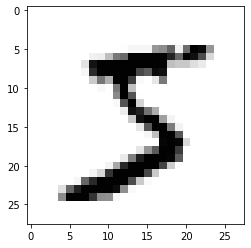

In [8]:
plt.imshow(view_img,cmap='Greys')

In [9]:
y[0]

'5'

# Our X variable has 70,000 rows(images) and 784 columns(Features)

In [10]:
x.shape

(70000, 784)

# Image in data set is not stored as an image of the form 28x28 BUT stored as either a ROW or a COLUMN, so we re-shape it using re-shape function. 

In [11]:
random = x[69000]
random_img = random.reshape(28,28)

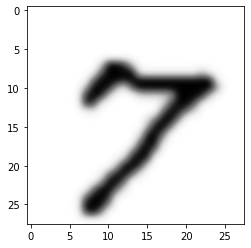

In [12]:
plt.imshow(random_img, cmap = 'Greys', interpolation = 'bicubic')

# Now we need to split data into Training Test and Testing set. In our case we are going to split 70,000 images in the ratio 60,000:10,000 by hardcore method without using split function

In [13]:
xtrain, xtest = x[:60000],x[60000:]
ytrain, ytest = y[:60000],x[60000:]

# It is important to shuffle the dataset to avoid any element of bias/patterns in the split datasets before training the ML model. Therefore improving model quality.

In [14]:
shuffle_index = np.random.permutation(60000)
xtrain, ytrain = xtrain[shuffle_index], ytrain[shuffle_index]

In [15]:
shuffle_index

array([36351, 10225, 20751, ..., 43320,  6912, 11777])

In [16]:
y_train_7 = (ytrain==7)
y_test_7 = (ytest==7)

In [17]:
y_train_7

array([False, False, False, ..., False, False, False])

In [18]:
y_test_7

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

# Converting Object Data type to integer Data type

In [19]:
ytrain

array(['0', '4', '0', ..., '6', '3', '3'], dtype=object)

In [20]:
ytrain = ytrain.astype(np.int8)
ytest = ytest.astype(np.int8)

In [21]:
ytrain

array([0, 4, 0, ..., 6, 3, 3], dtype=int8)

# Building a Logistic Regression model with Tolerance level of 0.1 and therefore fiting our training dataset into the model.

In [22]:
clf = LogisticRegression(tol=0.1)

In [23]:
clf.fit(xtrain, ytrain)
example = clf.predict([random])
print(example)

[7]


In [24]:
clf.predict([random])

array([7], dtype=int8)

# Checking the accuracy of our Logistic Regression Model

In [25]:
from sklearn.model_selection import cross_val_score
acc = cross_val_score(clf,xtrain,ytrain, cv=3, scoring ="accuracy")

In [26]:
acc.mean()

0.9176833333333333